In [1]:
from log_parser import from_dir_paths_get_eval_metrics

dataset_key = 'sports' # 'ml-1m', 'sports', 'beauty'
ML_1M_Paths = [
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200346',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200356',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200404',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200411',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200421',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200429',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200438',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200447',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200457']

Amazon_Sports_paths = [
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201755',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201803',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201812',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201821',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201831']
Amazon_Beauty_Paths = [
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201641',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201649',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201657',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201705',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201714']

path_dict = {'ml-1m': ML_1M_Paths, 'sports': Amazon_Sports_paths, 'beauty': Amazon_Beauty_Paths}

In [2]:
## Load the evaluation metrics
eval_metrics = from_dir_paths_get_eval_metrics(path_dict[dataset_key], )
print(eval_metrics)
#print(eval_metrics[path_dict[dataset_key]].keys())

{'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201755': ({'val_loss_seen': 317545.1369509697, 'val_loss_unseen': 35311.30160045624, 'val_avg_loss_seen': 9.911206247104145, 'val_avg_loss_unseen': 9.921691936065253, 'val_total_seen': 32039, 'val_total_unseen': 3559, 'val_recall_10_seen': 0.006897842977195978, 'val_recall_10_unseen': 0.0059005338698625565, 'val_recall_20_seen': 0.010799338109791279, 'val_recall_20_unseen': 0.010396178811788559, 'val_ndcg_10_seen': 0.002832539612427354, 'val_ndcg_10_unseen': 0.0023893783800303936, 'val_ndcg_20_seen': 0.003798714140430093, 'val_ndcg_20_unseen': 0.0035081494133919477, 'val_loss': 289328.09610562783, 'val_avg_loss': 9.912254580353558, 'val_total': 35598, 'val_recall_10': 0.00679813447916239, 'val_recall_20': 0.010759031240259516, 'val_ndcg_10': 0.0027882334484265452, 'val_ndcg_20': 0.003769664197637555, 'test_loss_seen': 320364.2029223442, 'test_loss_unseen': 35525.46321773529, 'test_avg_loss_seen': 9.999194822633171, 'test_avg

                                                path  test_recall_20  \
0  exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/su...          0.0062   
1  exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/su...          0.0141   
2  exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/su...          0.0169   
3  exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/su...          0.0200   
4  exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/su...          0.0094   

   test_recall_20_seen  test_recall_20_unseen  
0               0.0060                 0.0073  
1               0.0138                 0.0149  
2               0.0161                 0.0176  
3               0.0194                 0.0203  
4               0.0087                 0.0094  


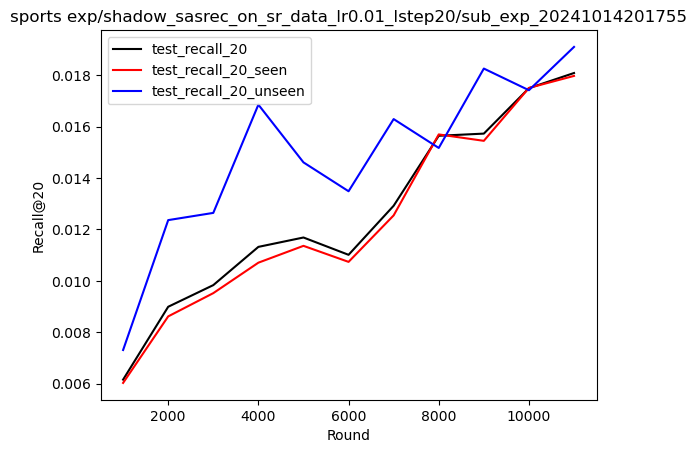

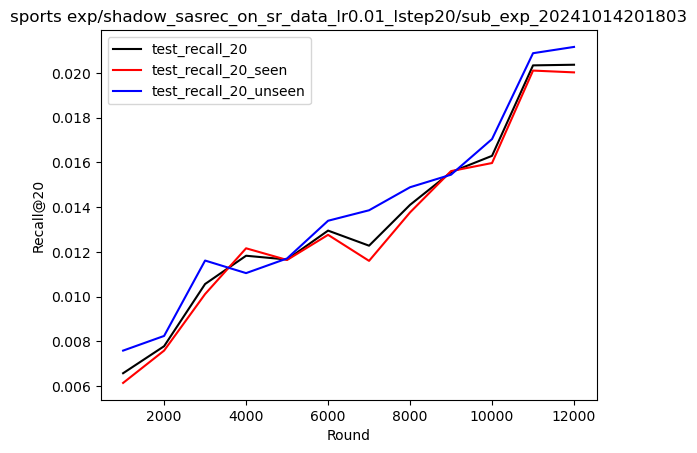

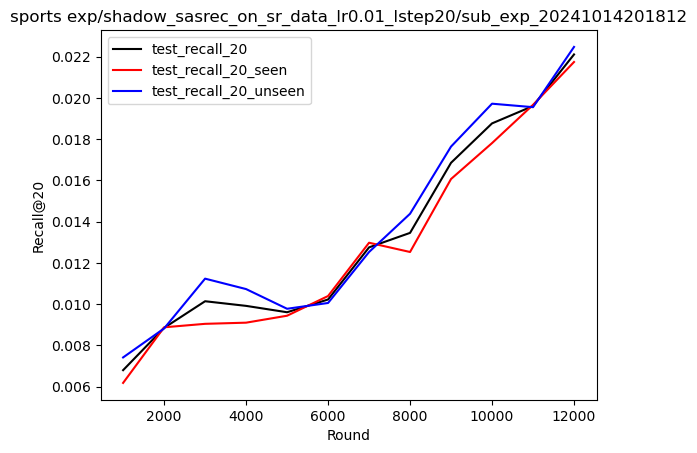

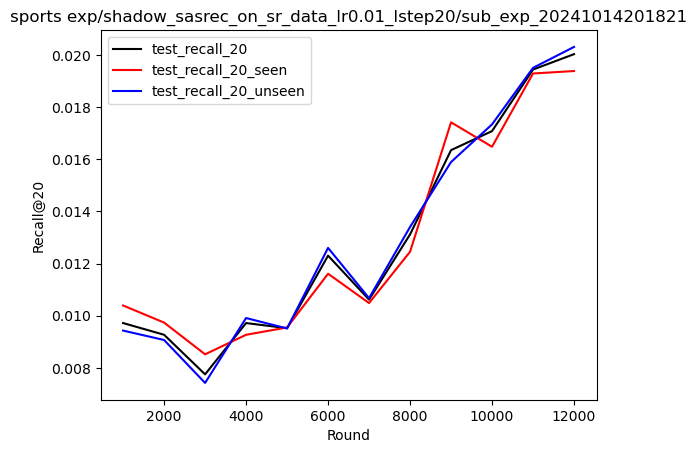

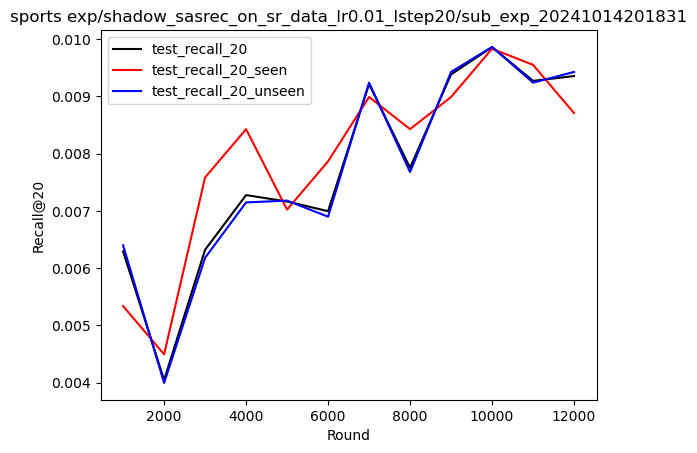

In [4]:
## from evaluation metrics plot the metrics
## and show best results
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rubics = ['test_recall_20']
seen_rubics = ['test_recall_20_seen']
unseen_rubics = ['test_recall_20_unseen']

## print df
columns = ['path', 'test_recall_20', 'test_recall_20_seen', 'test_recall_20_unseen']

df_dict = {}
for column in columns:
    df_dict[column] = []

for dataset_path, result in eval_metrics.items():
    (best_result, round_via_results) = result
    df_dict['path'].append(dataset_path)
    for column in columns[1:]:
        df_dict[column].append(best_result[column])
df = pd.DataFrame(df_dict)
## print in 4 decimal places
print(df.round(4))        
    
## plot round via results and save the best results as df
for dataset_path, result in eval_metrics.items():
    (best_result, round_via_results) = result
    rubic_results = [[]*len(rubics)]
    for rubic_id, rubic in enumerate(rubics):
        for i in range(0,len(round_via_results['Round'])):
            rubic_results[rubic_id].append(round_via_results['Results_raw'][i][rubic])
    rubic_results = np.array(rubic_results)
    seen_rubic_results = [[]*len(seen_rubics)]
    for seen_rubic in seen_rubics:
        for i in range(len(round_via_results['Round'])):
            seen_rubic_results[rubic_id].append(round_via_results['Results_raw'][i][seen_rubic])
    seen_rubic_results = np.array(seen_rubic_results)
    unseen_rubic_results = [[]*len(unseen_rubics)]
    for unseen_rubic in unseen_rubics:
        for i in range(len(round_via_results['Round'])):
            unseen_rubic_results[rubic_id].append(round_via_results['Results_raw'][i][unseen_rubic])
    unseen_rubic_results = np.array(unseen_rubic_results)
    
    ## plot the results
    fig, ax = plt.subplots()
    for rubic_id, rubic_result in enumerate(rubic_results):
        ax.plot(round_via_results['Round'], rubic_result, label = rubics[rubic_id], color='black')
    for rubic_id, seen_rubic_result in enumerate(seen_rubic_results):
        ax.plot(round_via_results['Round'], seen_rubic_result, label = seen_rubics[rubic_id], color='red')
    for rubic_id, unseen_rubic_result in enumerate(unseen_rubic_results):
        ax.plot(round_via_results['Round'], unseen_rubic_result, label = unseen_rubics[rubic_id], color='blue')
    ax.set_xlabel('Round')
    ax.set_ylabel('Recall@20')
    ax.set_title(f'{dataset_key} {dataset_path}')
    ax.legend()
    plt.show()
